<a href="https://colab.research.google.com/github/GauriG7/Gauri_practice/blob/main/CaketrendIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import uuid

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Define product categories and items with Indian preferences
product_data = {
    'Birthday Cakes': {
        'products': ['Chocolate Birthday Cake', 'Vanilla Birthday Cake', 'Butterscotch Birthday Cake',
                    'Black Forest Cake', 'Pineapple Cake', 'Strawberry Cake', 'Mango Cake',
                    'Photo Cake', 'Designer Birthday Cake', 'Eggless Chocolate Cake'],
        'price_range': (300, 2500),
        'seasonal_factor': 1.0
    },
    'Wedding Cakes': {
        'products': ['Multi-Tier Wedding Cake', '3-Tier Vanilla Wedding Cake', 'Designer Wedding Cake',
                    'Traditional Indian Wedding Cake', 'Fondant Wedding Cake', 'Floral Wedding Cake'],
        'price_range': (2000, 15000),
        'seasonal_factor': 1.2  # Higher during wedding season
    },
    'Festival Cakes': {
        'products': ['Diwali Special Cake', 'Christmas Fruit Cake', 'New Year Cake', 'Holi Color Cake',
                    'Eid Special Cake', 'Raksha Bandhan Cake', 'Karva Chauth Cake', 'Ganesh Chaturthi Cake'],
        'price_range': (250, 1200),
        'seasonal_factor': 2.5  # Much higher during festivals
    },
    'Pastries': {
        'products': ['Chocolate Pastry', 'Vanilla Pastry', 'Strawberry Pastry', 'Pineapple Pastry',
                    'Black Forest Pastry', 'Choco Truffle Pastry', 'Butterscotch Pastry', 'Mango Pastry'],
        'price_range': (80, 250),
        'seasonal_factor': 0.8
    },
    'Cupcakes': {
        'products': ['Chocolate Cupcake', 'Vanilla Cupcake', 'Red Velvet Cupcake', 'Lemon Cupcake',
                    'Strawberry Cupcake', 'Oreo Cupcake', 'Rainbow Cupcake', 'Nutella Cupcake'],
        'price_range': (50, 150),
        'seasonal_factor': 0.9
    },
    'Indian Sweets': {
        'products': ['Gulab Jamun Cake', 'Rasmalai Cake', 'Kulfi Cake', 'Kaju Katli Cake',
                    'Motichoor Cake', 'Rasgulla Cake', 'Milk Cake', 'Carrot Halwa Cake'],
        'price_range': (200, 800),
        'seasonal_factor': 1.5  # Popular during festivals
    },
    'Sugar-Free Cakes': {
        'products': ['Sugar-Free Chocolate Cake', 'Sugar-Free Vanilla Cake', 'Diabetic Special Cake',
                    'Sugar-Free Black Forest', 'Low-Calorie Cake', 'Stevia Sweetened Cake'],
        'price_range': (350, 1500),
        'seasonal_factor': 0.7
    }
}

# Indian cities for customer locations
indian_cities = ['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata', 'Pune', 'Hyderabad',
                'Ahmedabad', 'Jaipur', 'Lucknow', 'Kanpur', 'Nagpur', 'Indore', 'Bhopal', 'Vadodara']

# Customer demographics
customer_names = [
    'Rahul Sharma', 'Priya Singh', 'Amit Patel', 'Sneha Gupta', 'Rajesh Kumar', 'Kavya Iyer',
    'Vikram Mehta', 'Pooja Agarwal', 'Suresh Reddy', 'Anita Joshi', 'Manoj Verma', 'Deepika Shah',
    'Arjun Nair', 'Ritu Bansal', 'Sachin Yadav', 'Megha Kulkarni', 'Kiran Malhotra', 'Sanya Kapoor',
    'Rohan Sinha', 'Nisha Tiwari', 'Gaurav Chopra', 'Divya Khanna', 'Akash Jain', 'Shweta Bose',
    'Nikhil Aggarwal', 'Pallavi Saxena', 'Harsh Pandey', 'Richa Mishra', 'Sidharth Bajaj', 'Tanvi Goel',
    'Varun Singhal', 'Ishita Arora', 'Ravi Bhatt', 'Sonali Das', 'Kunal Mittal', 'Preeti Goyal',
    'Abhishek Modi', 'Kritika Sharma', 'Sanjay Thakur', 'Aditi Rao', 'Manish Gupta', 'Shreya Khurana',
    'Anuj Bhardwaj', 'Swati Joshi', 'Rohit Chawla', 'Neha Rastogi', 'Aman Sethi', 'Payal Dixit',
    'Kartik Ahluwalia', 'Prachi Vohra', 'Ajay Bhatia', 'Simran Kohli', 'Vivek Dutta', 'Anjali Sood'
]

# Generate festival dates and special occasions for 2023-2024
festival_dates = {
    '2023-01-26': 'Republic Day', '2023-03-08': 'Holi', '2023-08-15': 'Independence Day',
    '2023-08-30': 'Ganesh Chaturthi', '2023-10-15': 'Dussehra', '2023-11-12': 'Diwali',
    '2023-11-27': 'Guru Nanak Jayanti', '2023-12-25': 'Christmas', '2023-12-31': 'New Year Eve',
    '2024-01-01': 'New Year', '2024-01-14': 'Makar Sankranti', '2024-02-14': 'Valentine Day',
    '2024-03-25': 'Holi', '2024-04-21': 'Ram Navami', '2024-08-15': 'Independence Day',
    '2024-09-07': 'Ganesh Chaturthi', '2024-10-12': 'Dussehra', '2024-11-01': 'Diwali',
    '2024-12-25': 'Christmas'
}

# Create customer base
num_customers = 500
customers = []

for i in range(num_customers):
    customer = {
        'customer_id': f'CUST_{str(uuid.uuid4())[:8].upper()}',
        'name': random.choice(customer_names),
        'city': random.choice(indian_cities),
        'age_group': random.choices(['18-25', '26-35', '36-45', '46-60', '60+'],
                                  weights=[0.15, 0.35, 0.25, 0.20, 0.05])[0],
        'customer_type': random.choices(['Regular', 'Occasional', 'Frequent'],
                                      weights=[0.6, 0.3, 0.1])[0],
        'registration_date': datetime(2023, 1, 1) + timedelta(days=random.randint(0, 730))
    }
    customers.append(customer)

# Generate purchase transactions
transactions = []
transaction_id_counter = 1

# Date range for transactions (Jan 2023 to Sep 2024)
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 9, 15)

# Generate transactions for each customer
for customer in customers:
    customer_id = customer['customer_id']
    customer_type = customer['customer_type']

    # Determine number of purchases based on customer type
    if customer_type == 'Frequent':
        num_purchases = random.randint(15, 50)
    elif customer_type == 'Regular':
        num_purchases = random.randint(5, 20)
    else:  # Occasional
        num_purchases = random.randint(1, 8)

    # Generate purchase dates
    for _ in range(num_purchases):
        # Generate random purchase date
        days_from_start = random.randint(0, (end_date - start_date).days)
        purchase_date = start_date + timedelta(days=days_from_start)

        # Check if it's near a festival (increase probability of festival cakes)
        is_festival_period = False
        festival_name = None

        for festival_date_str, festival in festival_dates.items():
            festival_date = datetime.strptime(festival_date_str, '%Y-%m-%d')
            if abs((purchase_date - festival_date).days) <= 7:
                is_festival_period = True
                festival_name = festival
                break

        # Seasonal adjustments for wedding season (Oct-Mar in India)
        is_wedding_season = purchase_date.month in [10, 11, 12, 1, 2, 3]

        # Birthday season (assume distributed throughout year with slight peak in winter)
        is_birthday_season = purchase_date.month in [12, 1, 2, 3]

        # Select product category based on season and festivals
        category_weights = {}

        if is_festival_period:
            category_weights = {
                'Festival Cakes': 0.4, 'Indian Sweets': 0.25, 'Birthday Cakes': 0.15,
                'Pastries': 0.1, 'Cupcakes': 0.05, 'Wedding Cakes': 0.03, 'Sugar-Free Cakes': 0.02
            }
        elif is_wedding_season:
            category_weights = {
                'Wedding Cakes': 0.3, 'Birthday Cakes': 0.25, 'Indian Sweets': 0.2,
                'Pastries': 0.12, 'Cupcakes': 0.08, 'Festival Cakes': 0.03, 'Sugar-Free Cakes': 0.02
            }
        elif is_birthday_season:
            category_weights = {
                'Birthday Cakes': 0.35, 'Pastries': 0.2, 'Cupcakes': 0.15, 'Indian Sweets': 0.12,
                'Wedding Cakes': 0.1, 'Festival Cakes': 0.05, 'Sugar-Free Cakes': 0.03
            }
        else:
            # Regular season
            category_weights = {
                'Birthday Cakes': 0.3, 'Pastries': 0.25, 'Cupcakes': 0.15, 'Indian Sweets': 0.1,
                'Wedding Cakes': 0.1, 'Festival Cakes': 0.05, 'Sugar-Free Cakes': 0.05
            }

        # Select category
        categories = list(category_weights.keys())
        weights = list(category_weights.values())
        selected_category = random.choices(categories, weights=weights)[0]

        # Select product from category
        products = product_data[selected_category]['products']
        selected_product = random.choice(products)

        # Determine quantity (most purchases are single items, some bulk orders)
        quantity = random.choices([1, 2, 3, 4, 5, 6], weights=[0.6, 0.2, 0.1, 0.05, 0.03, 0.02])[0]

        # Calculate price with some variation
        base_price_range = product_data[selected_category]['price_range']
        base_price = random.uniform(base_price_range[0], base_price_range[1])

        # Apply seasonal factors
        seasonal_factor = product_data[selected_category]['seasonal_factor']
        if is_festival_period and selected_category == 'Festival Cakes':
            seasonal_factor *= 1.5

        # Price variations (discounts, premiums)
        price_variation = random.uniform(0.85, 1.15)  # ±15% variation

        final_price = base_price * seasonal_factor * price_variation
        total_amount = final_price * quantity

        # Payment method preferences in India
        payment_method = random.choices(
            ['Cash', 'UPI', 'Credit Card', 'Debit Card', 'Digital Wallet'],
            weights=[0.25, 0.35, 0.15, 0.15, 0.1]
        )[0]

        # Time of purchase (Indian shopping patterns)
        hour = random.choices(
            list(range(24)),
            weights=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.08,  # 0-9
                    0.12, 0.15, 0.12, 0.08, 0.06, 0.05, 0.08, 0.12, 0.15, 0.08,  # 10-19
                    0.05, 0.03, 0.02, 0.01]  # 20-23
        )[0]

        purchase_datetime = purchase_date.replace(
            hour=hour,
            minute=random.randint(0, 59),
            second=random.randint(0, 59)
        )

        # Create transaction record
        transaction = {
            'transaction_id': f'TXN_{str(transaction_id_counter).zfill(6)}',
            'customer_id': customer_id,
            'customer_name': customer['name'],
            'customer_city': customer['city'],
            'customer_age_group': customer['age_group'],
            'customer_type': customer['customer_type'],
            'purchase_date': purchase_datetime.strftime('%Y-%m-%d'),
            'purchase_time': purchase_datetime.strftime('%H:%M:%S'),
            'purchase_datetime': purchase_datetime.strftime('%Y-%m-%d %H:%M:%S'),
            'day_of_week': purchase_datetime.strftime('%A'),
            'month': purchase_datetime.strftime('%B'),
            'year': purchase_datetime.year,
            'quarter': f'Q{((purchase_datetime.month-1)//3)+1}',
            'product_category': selected_category,
            'product_name': selected_product,
            'quantity': quantity,
            'unit_price': round(final_price, 2),
            'total_amount': round(total_amount, 2),
            'payment_method': payment_method,
            'is_festival_period': is_festival_period,
            'festival_name': festival_name if is_festival_period else None,
            'is_wedding_season': is_wedding_season,
            'discount_applied': random.choice([True, False]) if random.random() < 0.3 else False,
            'discount_percentage': round(random.uniform(5, 20), 1) if random.random() < 0.3 else 0,
            'final_amount': round(total_amount * (1 - (random.uniform(5, 20)/100 if random.random() < 0.3 else 0)), 2)
        }

        transactions.append(transaction)
        transaction_id_counter += 1

# Create DataFrame
df = pd.DataFrame(transactions)

# Sort by purchase datetime
df = df.sort_values('purchase_datetime').reset_index(drop=True)

# Add some derived columns for analysis
df['revenue_segment'] = pd.cut(df['final_amount'],
                              bins=[0, 200, 500, 1000, 5000, float('inf')],
                              labels=['Low', 'Medium', 'High', 'Premium', 'Luxury'])

df['customer_lifetime_value'] = df.groupby('customer_id')['final_amount'].transform('sum')

# Display dataset information
print(f"Dataset Generated Successfully!")
print(f"Total Transactions: {len(df)}")
print(f"Total Customers: {df['customer_id'].nunique()}")
print(f"Date Range: {df['purchase_date'].min()} to {df['purchase_date'].max()}")
print(f"Total Revenue: ₹{df['final_amount'].sum():,.2f}")
print(f"Average Order Value: ₹{df['final_amount'].mean():.2f}")

print("\n=== SAMPLE DATA PREVIEW ===")
print(df.head(10).to_string())

print("\n=== CATEGORY WISE SALES SUMMARY ===")
category_summary = df.groupby('product_category').agg({
    'transaction_id': 'count',
    'final_amount': ['sum', 'mean'],
    'quantity': 'sum'
}).round(2)
category_summary.columns = ['Transaction_Count', 'Total_Revenue', 'Avg_Order_Value', 'Total_Quantity']
print(category_summary)

print("\n=== MONTHLY SALES TREND ===")
monthly_sales = df.groupby(['year', 'month'])['final_amount'].sum().round(2)
print(monthly_sales.head(12))

# Save to CSV
csv_filename = 'indian_cake_shop_synthetic_data.csv'
df.to_csv(csv_filename, index=False)
print(f"\n=== Dataset saved as '{csv_filename}' ===")

print("\n=== DATASET FEATURES INCLUDED ===")
print("Core Features:")
print("- Customer ID, Name, Demographics (City, Age Group, Customer Type)")
print("- Purchase Date, Time, DateTime with seasonality")
print("- Product Category and Product Name (Indian preferences)")
print("- Quantity, Unit Price, Total Amount, Final Amount (with discounts)")
print("- Payment Method (UPI, Cash, Cards - Indian payment preferences)")

print("\nAnalytical Features:")
print("- Festival periods and special occasions")
print("- Wedding season indicators")
print("- Day of week, Month, Quarter, Year")
print("- Revenue segments and Customer Lifetime Value")
print("- Seasonal and cultural factors affecting purchases")

print(f"\nDataset contains {len(df)} transactions from {df['customer_id'].nunique()} customers")
print(f"Revenue range: ₹{df['final_amount'].min():.2f} to ₹{df['final_amount'].max():.2f}")
print(f"Most popular category: {df['product_category'].mode().iloc[0]}")
print(f"Peak sales month: {df.groupby('month')['final_amount'].sum().idxmax()}")

Dataset Generated Successfully!
Total Transactions: 6177
Total Customers: 500
Date Range: 2023-01-01 to 2024-09-15
Total Revenue: ₹22,761,635.87
Average Order Value: ₹3684.90

=== SAMPLE DATA PREVIEW ===
  transaction_id    customer_id    customer_name customer_city customer_age_group customer_type purchase_date purchase_time    purchase_datetime day_of_week    month  year quarter product_category                 product_name  quantity  unit_price  total_amount  payment_method  is_festival_period festival_name  is_wedding_season  discount_applied  discount_percentage  final_amount revenue_segment  customer_lifetime_value
0     TXN_003540  CUST_168749B1       Aman Sethi        Bhopal              26-35       Regular    2023-01-01      07:23:43  2023-01-01 07:23:43      Sunday  January  2023      Q1    Wedding Cakes  3-Tier Vanilla Wedding Cake         3     9380.97      28142.92      Debit Card               False          None               True             False                  0.0  

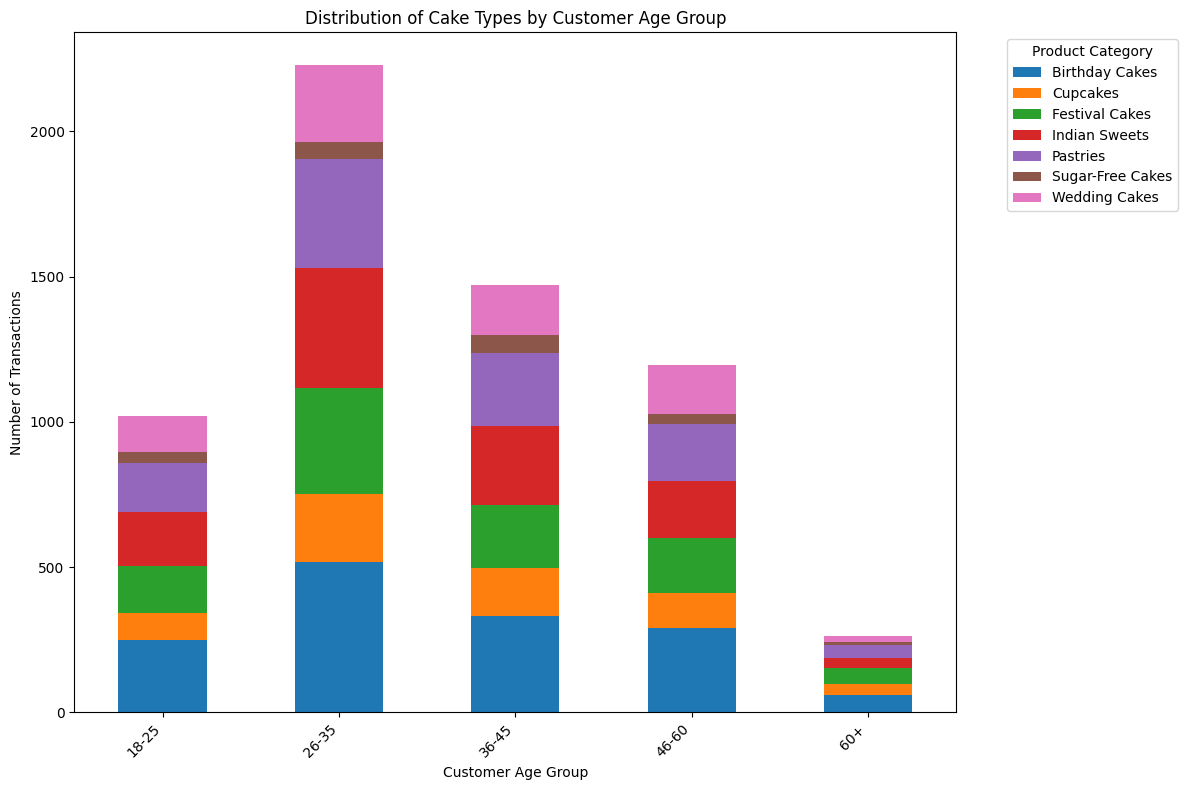

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by age group and product category and count transactions
age_category_counts = df.groupby(['customer_age_group', 'product_category']).size().unstack(fill_value=0)

# Sort age groups for better visualization
age_order = ['18-25', '26-35', '36-45', '46-60', '60+']
age_category_counts = age_category_counts.reindex(age_order)

# Plotting
plt.figure(figsize=(12, 8))
age_category_counts.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Distribution of Cake Types by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

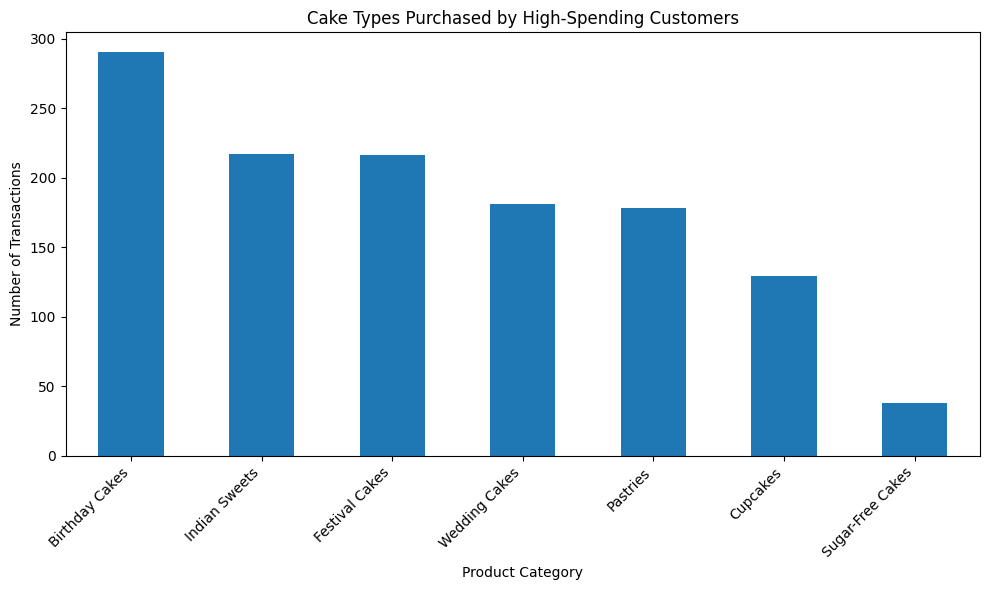

In [6]:
# Define 'high spend' customers (e.g., top 20% based on total spending)
high_spend_threshold = df['customer_lifetime_value'].quantile(0.8)
high_spend_customers = df[df['customer_lifetime_value'] >= high_spend_threshold]

# Group data by customer_id and product category for high spenders and count transactions
high_spend_category_counts = high_spend_customers.groupby(['customer_id', 'product_category']).size().unstack(fill_value=0)

# Sum the counts across customers to get the total transactions per category for high spenders
high_spend_category_totals = high_spend_category_counts.sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
high_spend_category_totals.plot(kind='bar')

plt.title('Cake Types Purchased by High-Spending Customers')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()